# **Task 5: Morphological Operations**

Given the following image, identify 'O' in the image using morphological operations.

<img src="https://raw.githubusercontent.com/omzlette/FRA321_Basic_AI/main/PYCV/img/text_frombook.png" width=1000/>

In [326]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib

%matplotlib inline

# Read image from URL
req = urllib.request.urlopen('https://raw.githubusercontent.com/omzlette/FRA321_Basic_AI/main/PYCV/img/text_frombook.png')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
oriimg = cv2.imdecode(arr, cv2.IMREAD_GRAYSCALE)
outimg = oriimg.copy()

In [327]:
def imreconstruct(mask, marker, ksize:tuple):
    se = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)
    recon = marker
    reconold = np.zeros(recon.shape, dtype=np.uint8)
    while np.sum(np.sum(recon - reconold)) != 0:
        reconold = recon
        recon = cv2.dilate(recon, se)
        recon = cv2.bitwise_and(recon, mask)
    return recon

## **Remove as much characters as possible**

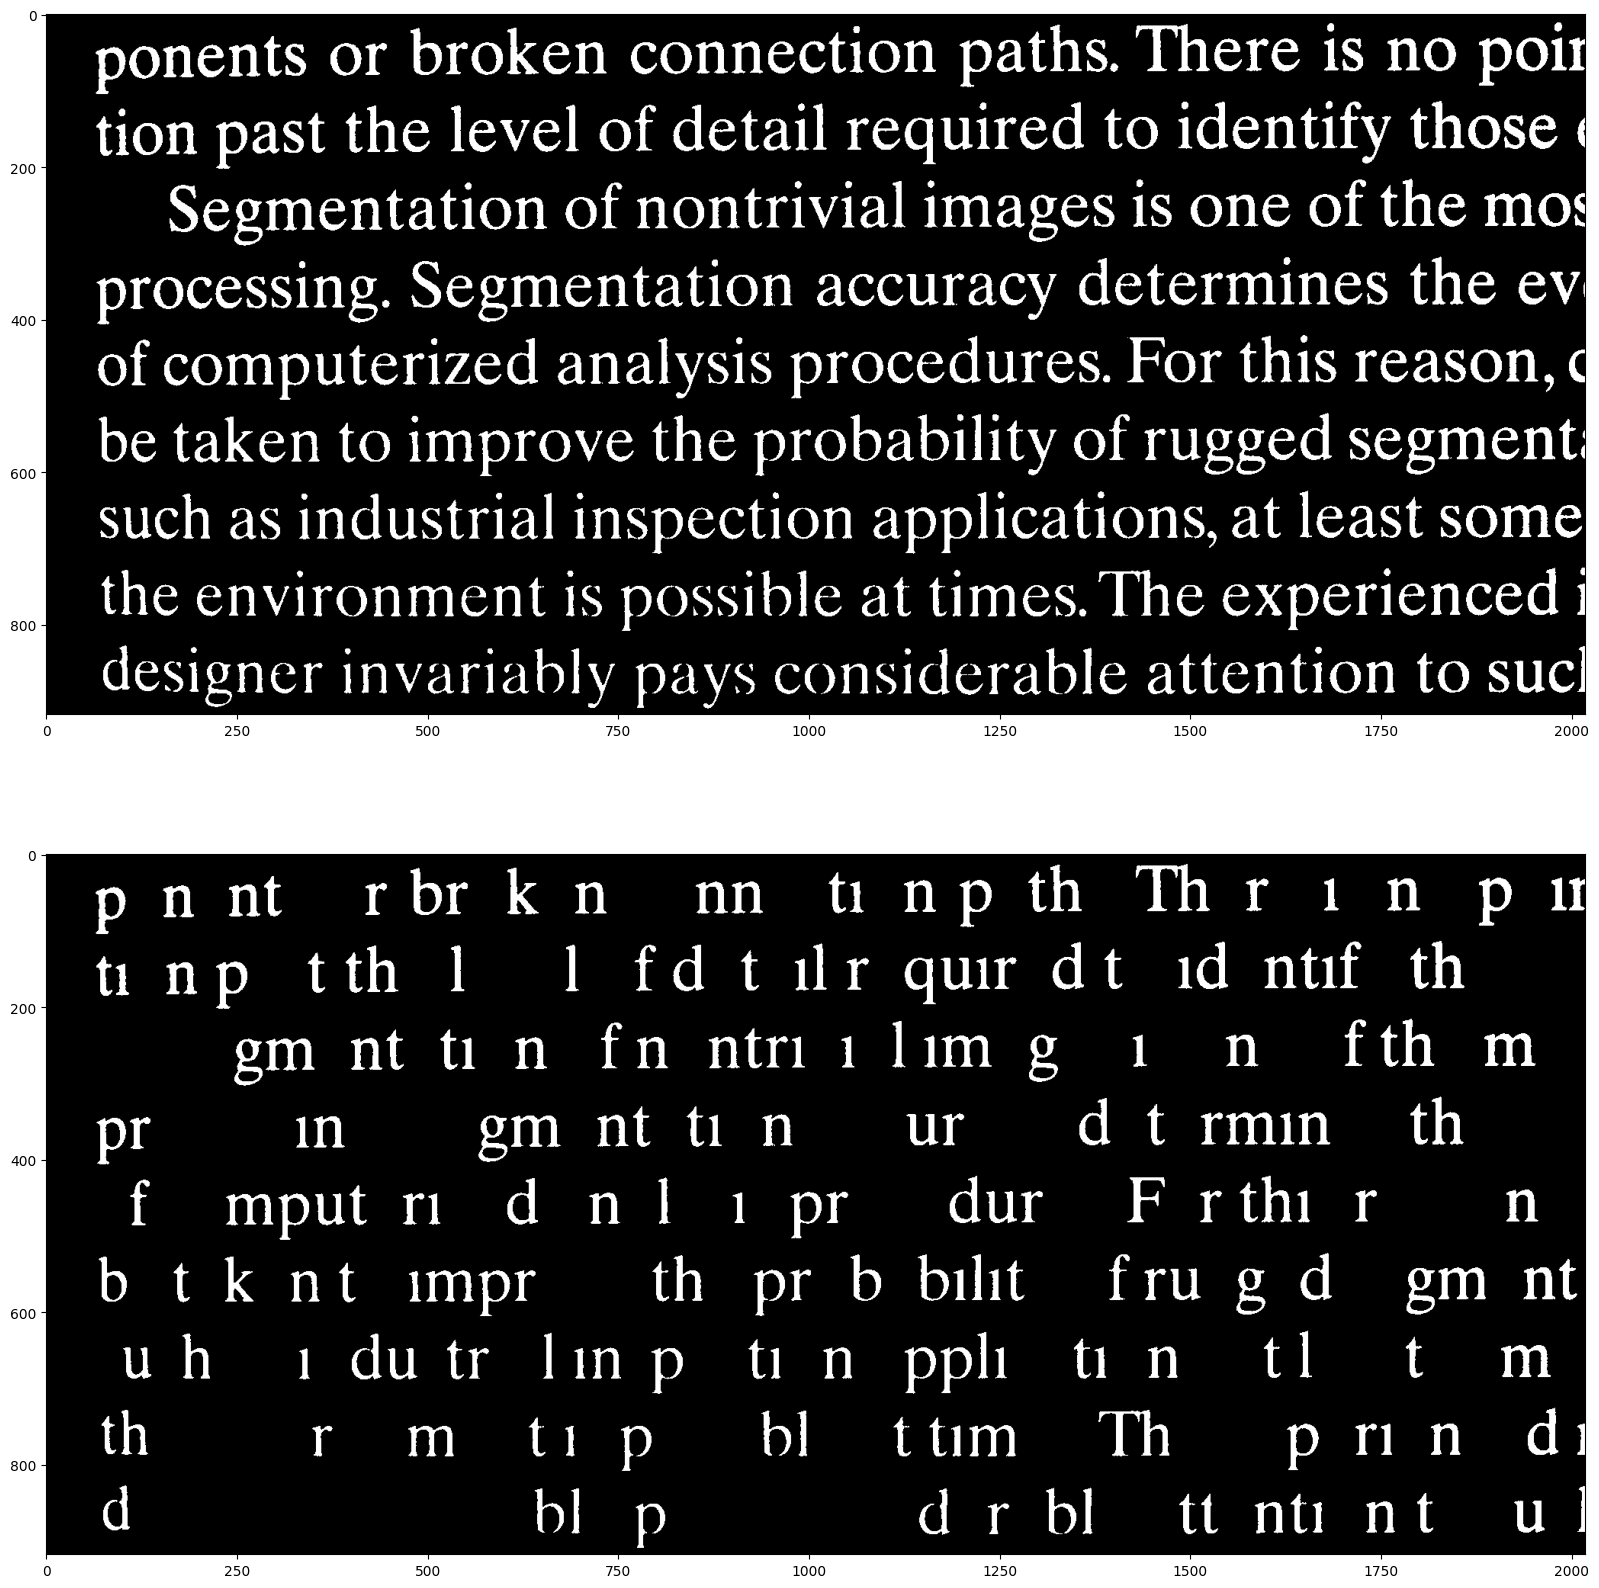

In [328]:
se = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 40))
longchara = cv2.erode(oriimg, se)

get2lines = imreconstruct(oriimg, longchara, (3, 3))

fig, axes = plt.subplots(2, 1, figsize=(30, 20))
axes[0].imshow(oriimg, cmap='gray')
axes[1].imshow(get2lines, cmap='gray')

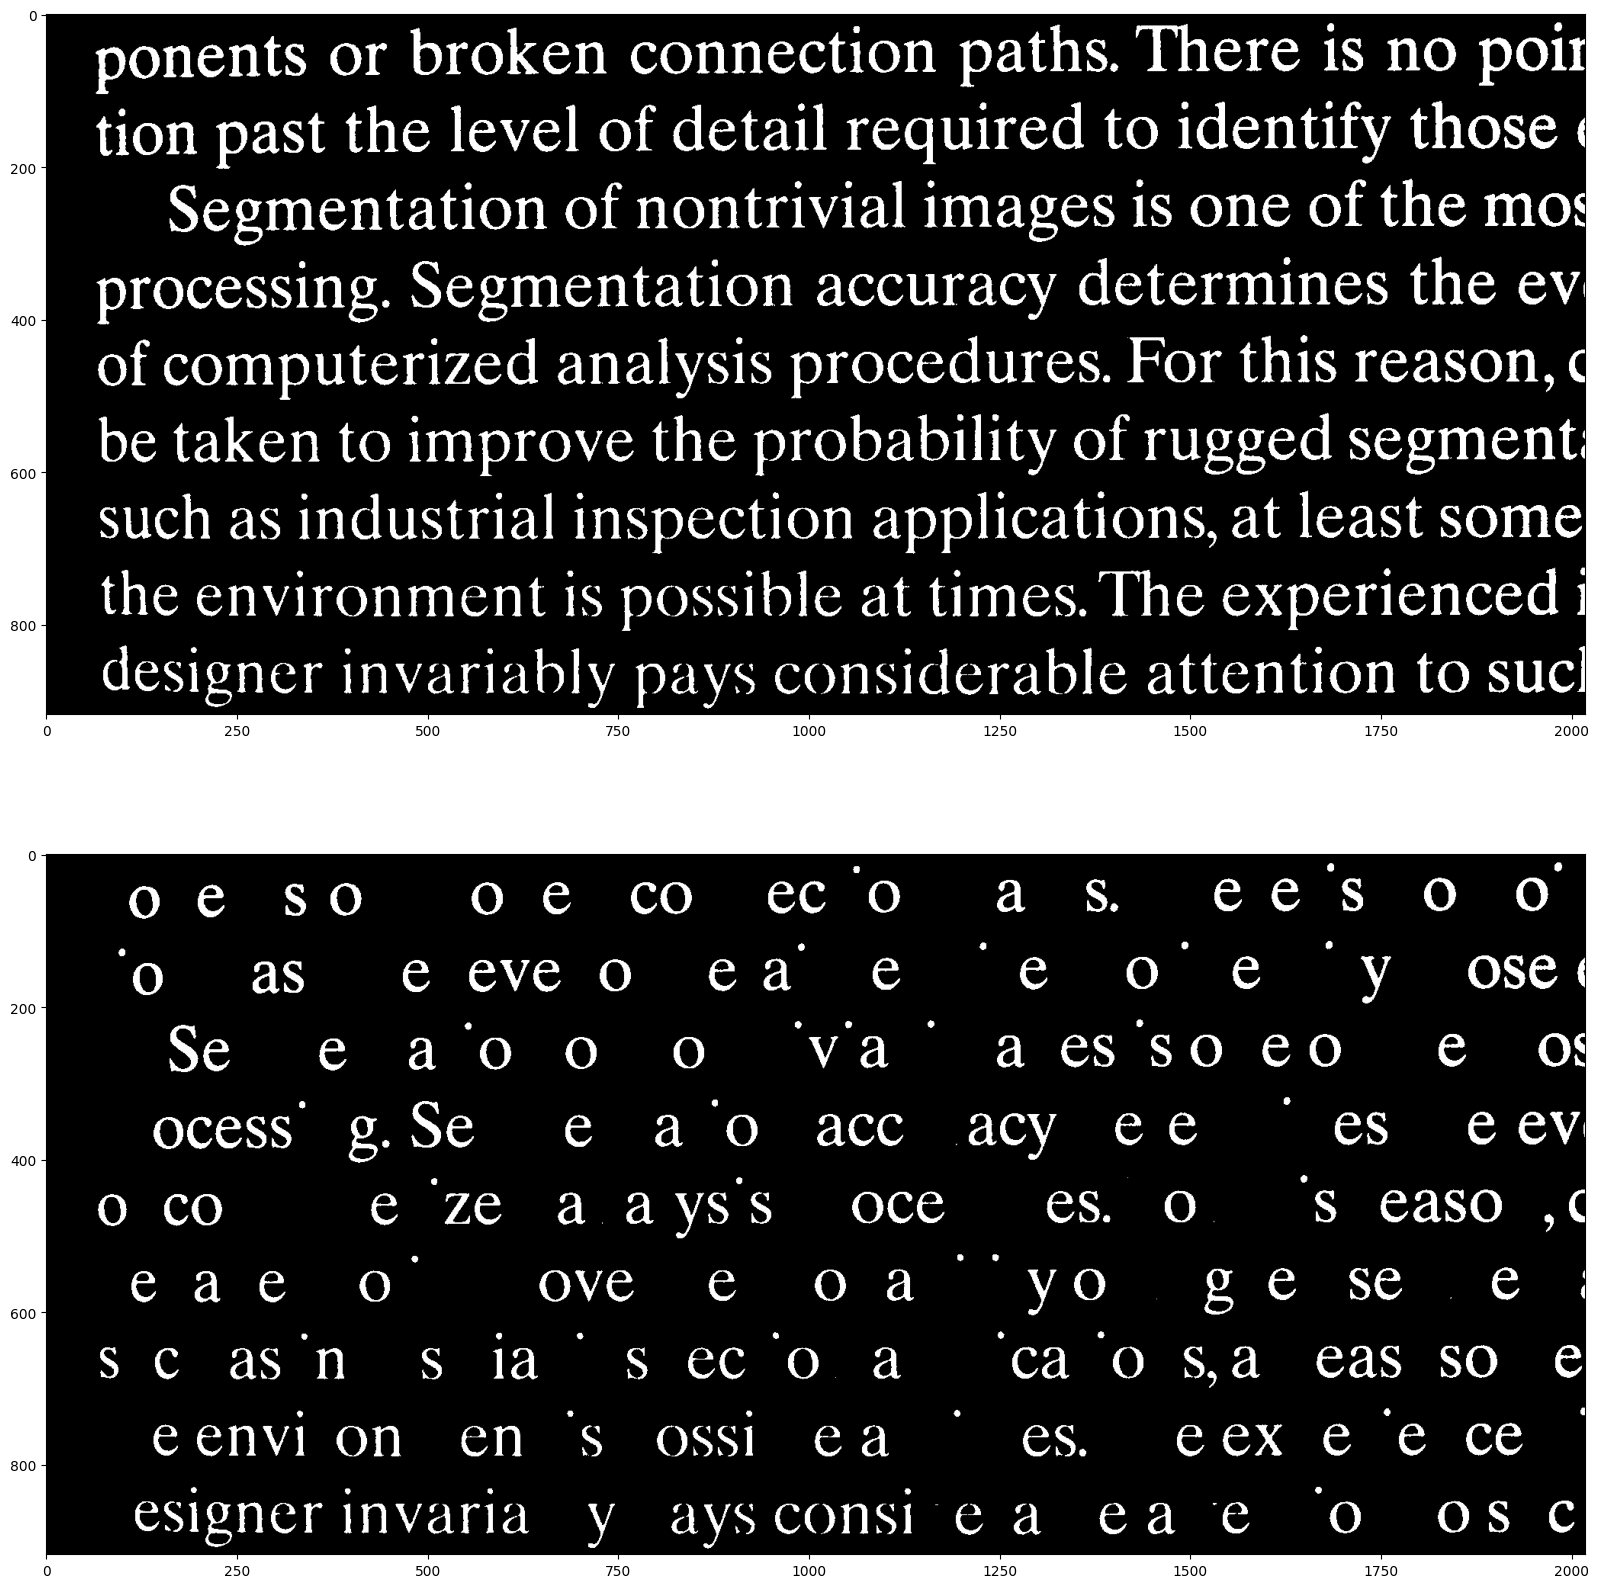

In [329]:
rm2lines = cv2.bitwise_not(get2lines)
rm2lines = cv2.bitwise_and(oriimg, rm2lines)

fig, axes = plt.subplots(2, 1, figsize=(30, 20))
axes[0].imshow(oriimg, cmap='gray')
axes[1].imshow(rm2lines, cmap='gray')

## **Dilate the image**

Since some of the 'O's are disconnected, we need to dilate the image to connect them.

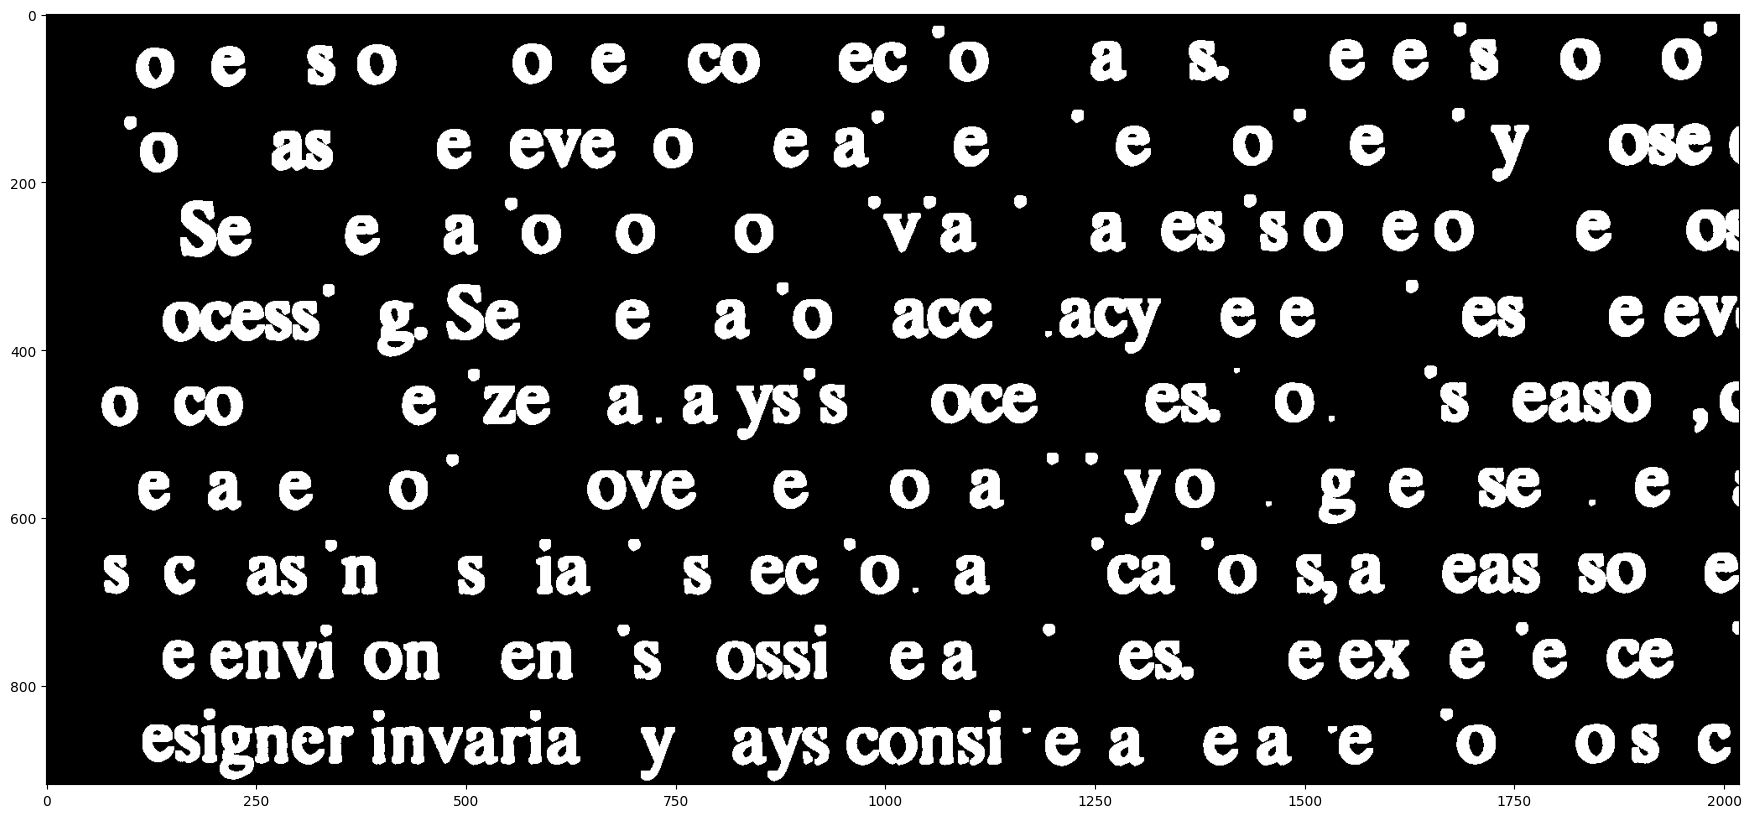

In [330]:
# openimg = cv2.morphologyEx(oriimg, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
dilimg = cv2.dilate(rm2lines, kernel, iterations=2)

fig, axes = plt.subplots(1, 1, figsize=(30, 10))
axes.imshow(dilimg, cmap='gray')
# axes[1].imshow(img, cmap='gray')

## **Fill in the holes**

Then, we fill in the holes to make the 'O's solid.

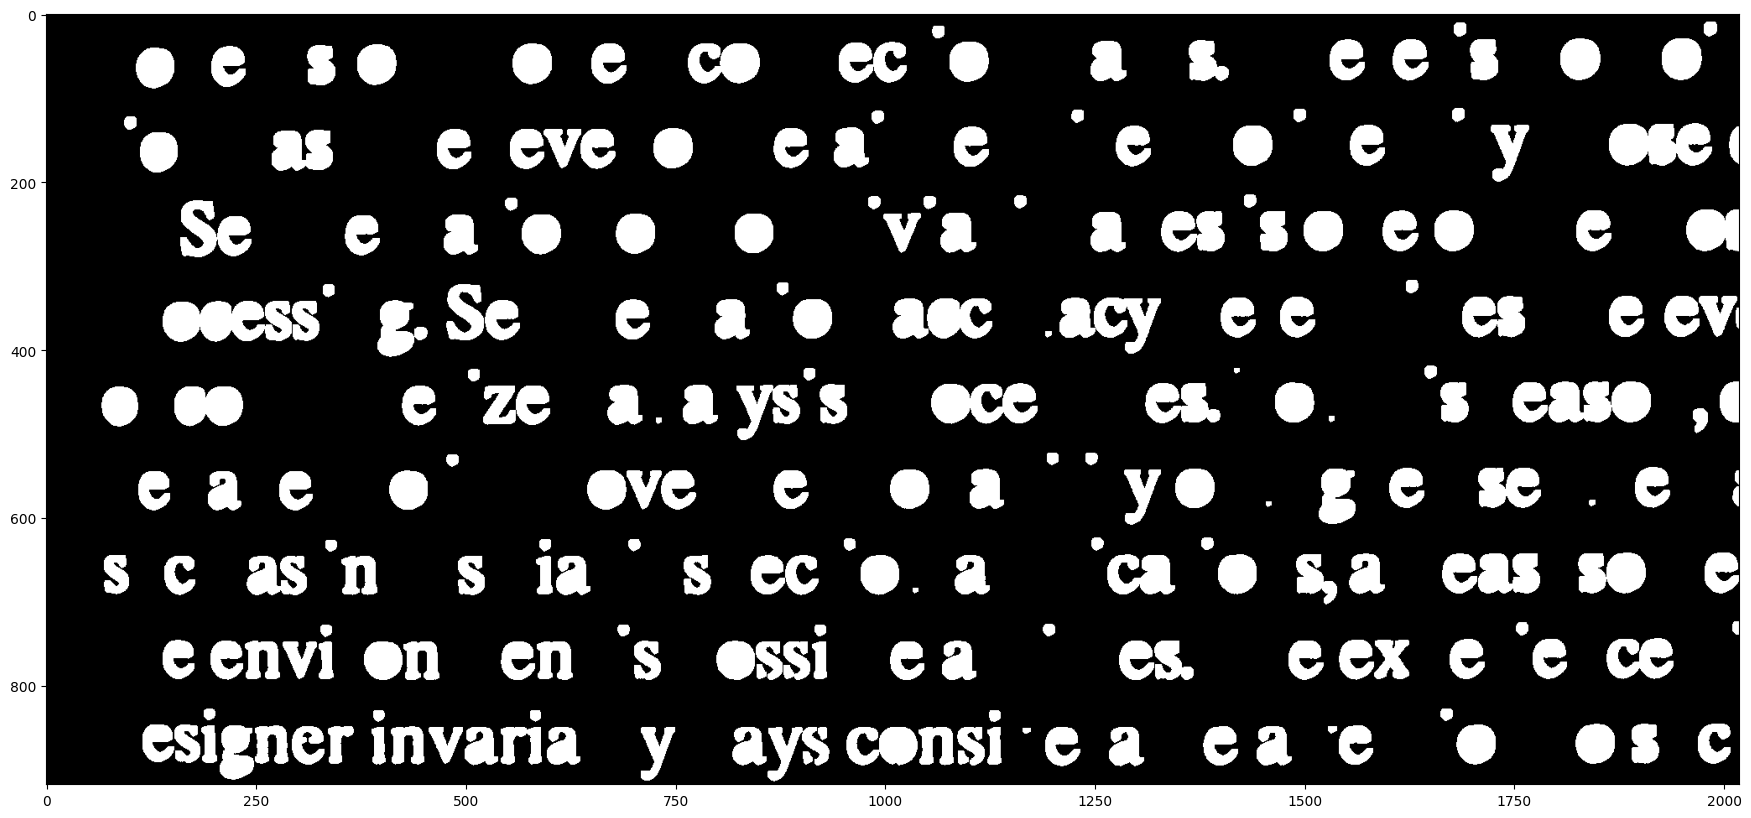

In [331]:
_, dilimg_th = cv2.threshold(dilimg, 220, 255, cv2.THRESH_BINARY_INV)
filldilimg = dilimg_th.copy()

mask = np.zeros((filldilimg.shape[0]+2, filldilimg.shape[1]+2), dtype=np.uint8)
cv2.floodFill(filldilimg, mask, (0,0), 0)

invdil = cv2.bitwise_not(filldilimg)

out = cv2.bitwise_and(dilimg_th, invdil)
fillo = cv2.bitwise_not(out)

plt.figure(figsize=(30, 10))
plt.imshow(fillo, cmap='gray')


## **Erode the image**

After that, we erode the image and use image opening to remove anything that is not 'O'.

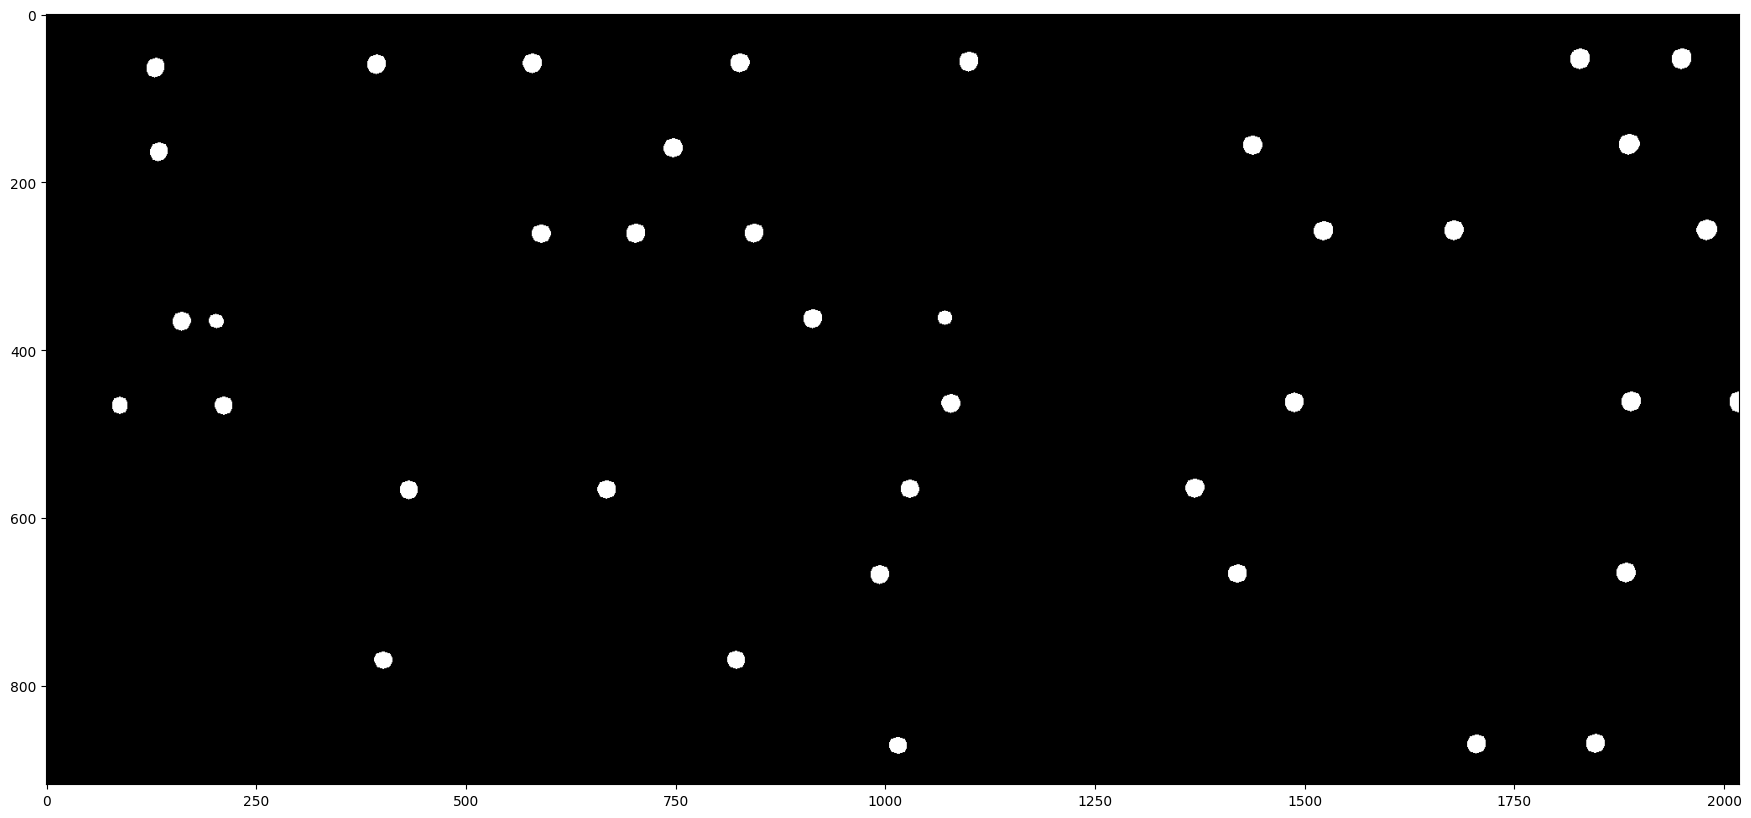

In [332]:
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
outimg = cv2.erode(fillo, se, iterations=3)

# REMOVE NOISE
kernelSize = 9

opIterations = 2

maxKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernelSize, kernelSize))
openingImg = cv2.morphologyEx(outimg, cv2.MORPH_OPEN, maxKernel, iterations=opIterations, borderType=cv2.BORDER_REFLECT101)

plt.figure(figsize=(30, 10))
plt.imshow(openingImg, cmap='gray')

Reconstruct the image and we will get:

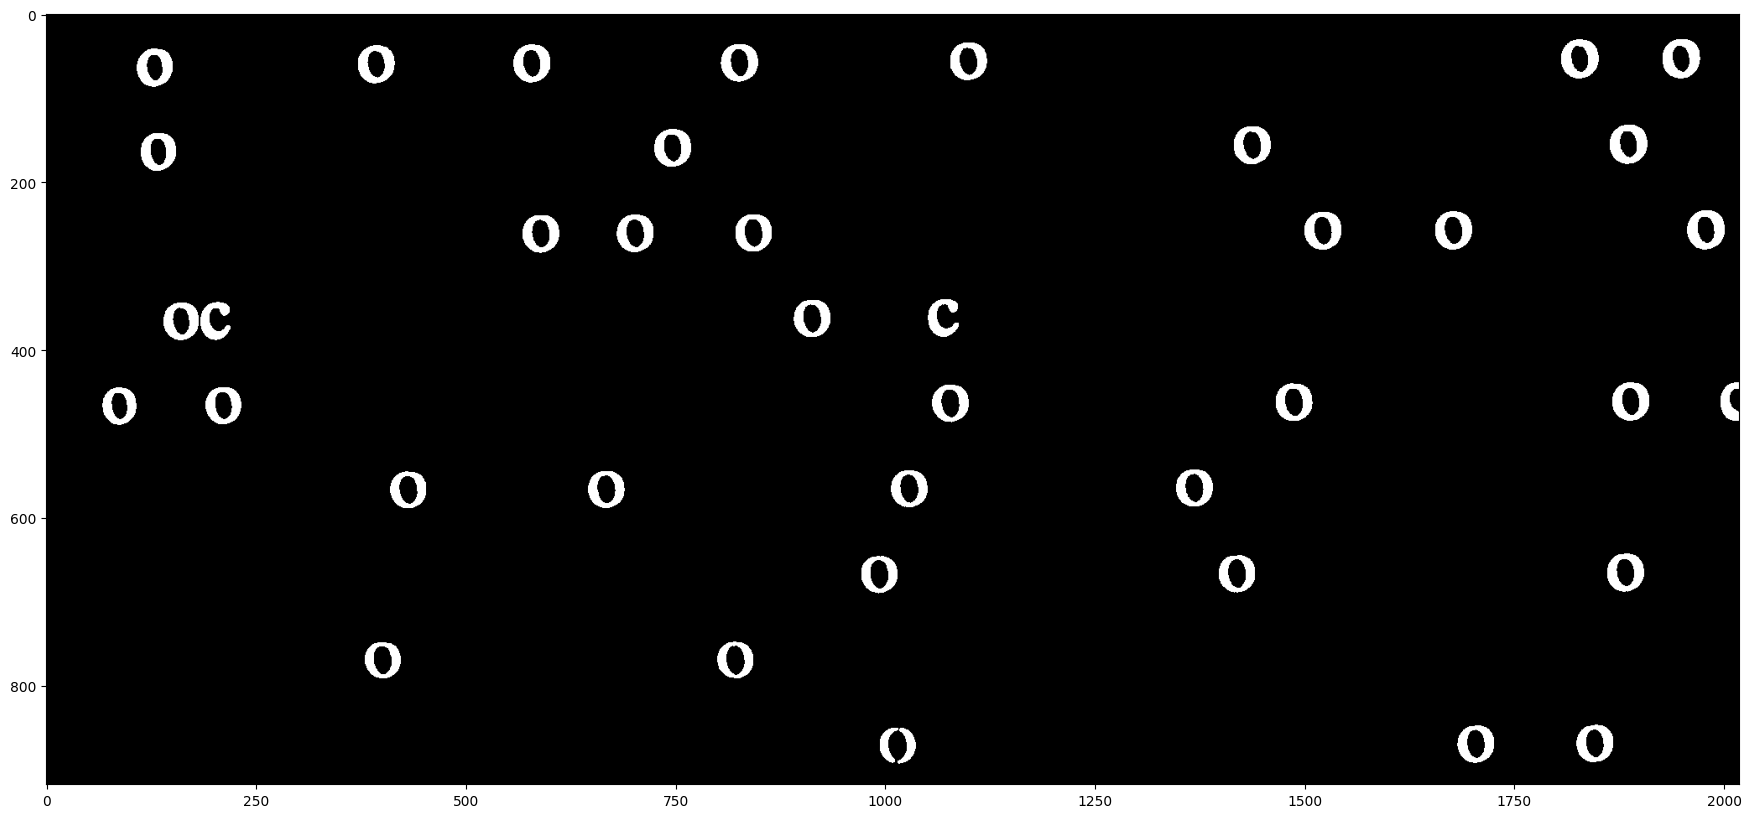

In [333]:
img4recon = cv2.dilate(rm2lines, kernel, iterations=1)

getleft = imreconstruct(img4recon, openingImg, (3, 3))

plt.figure(figsize=(30, 10))
plt.imshow(getleft, cmap='gray')

## **Remove remaining characters**

Since there are still some characters left, we need to remove them.

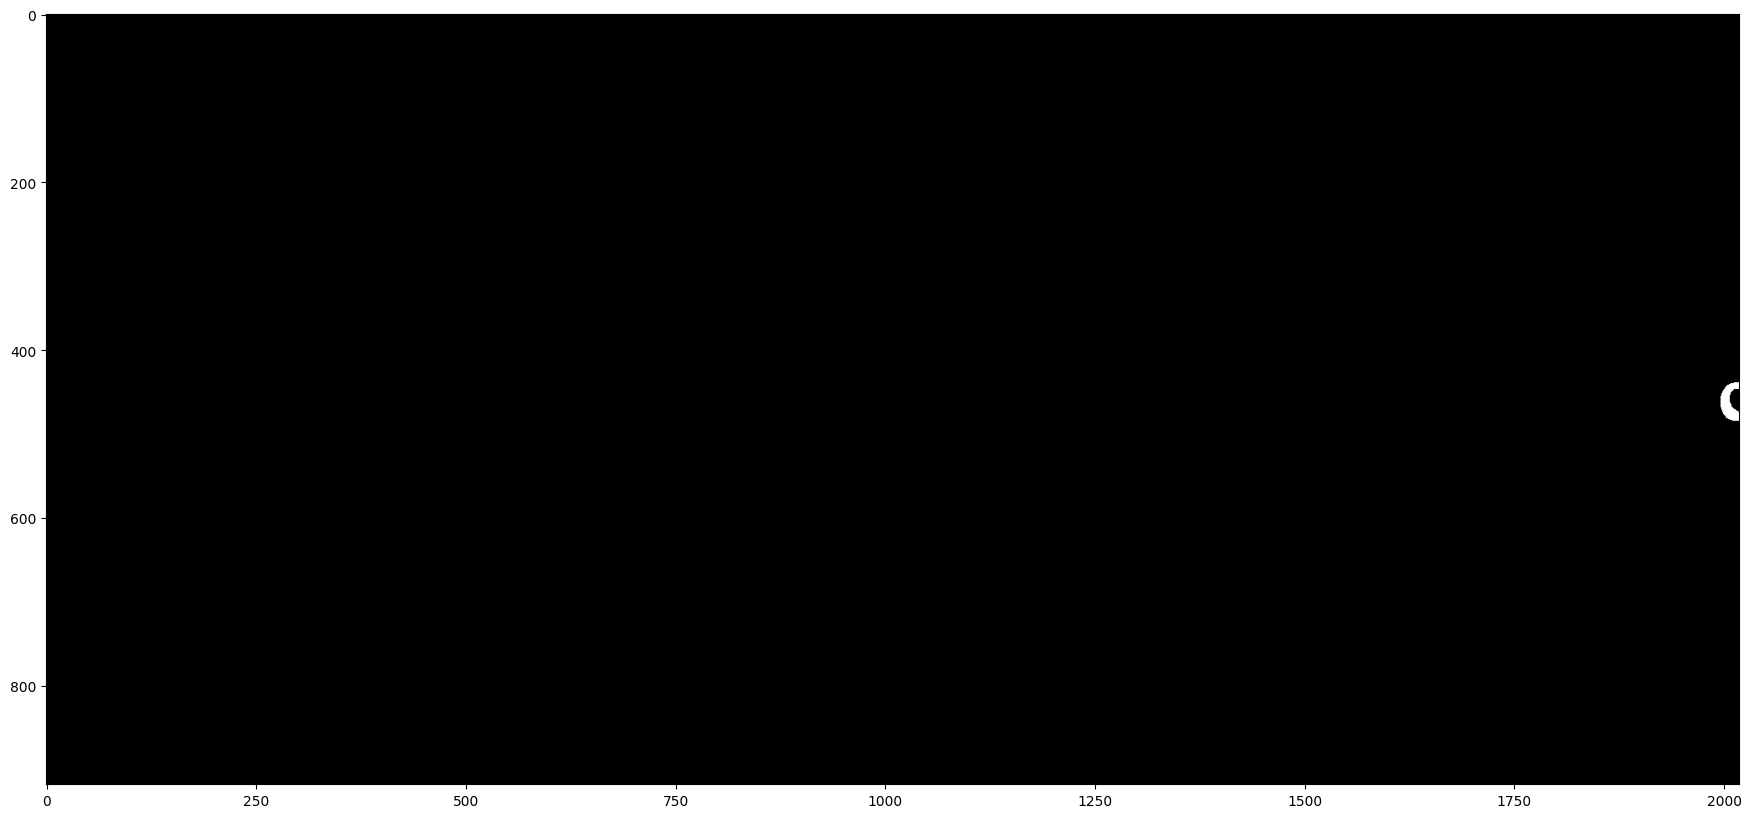

In [334]:
kernelLast = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 6))
rmborder = cv2.erode(getleft, kernelLast, iterations=1)

rmborder = imreconstruct(getleft, rmborder, (3, 3))

plt.figure(figsize=(30, 10))
plt.imshow(rmborder, cmap='gray')


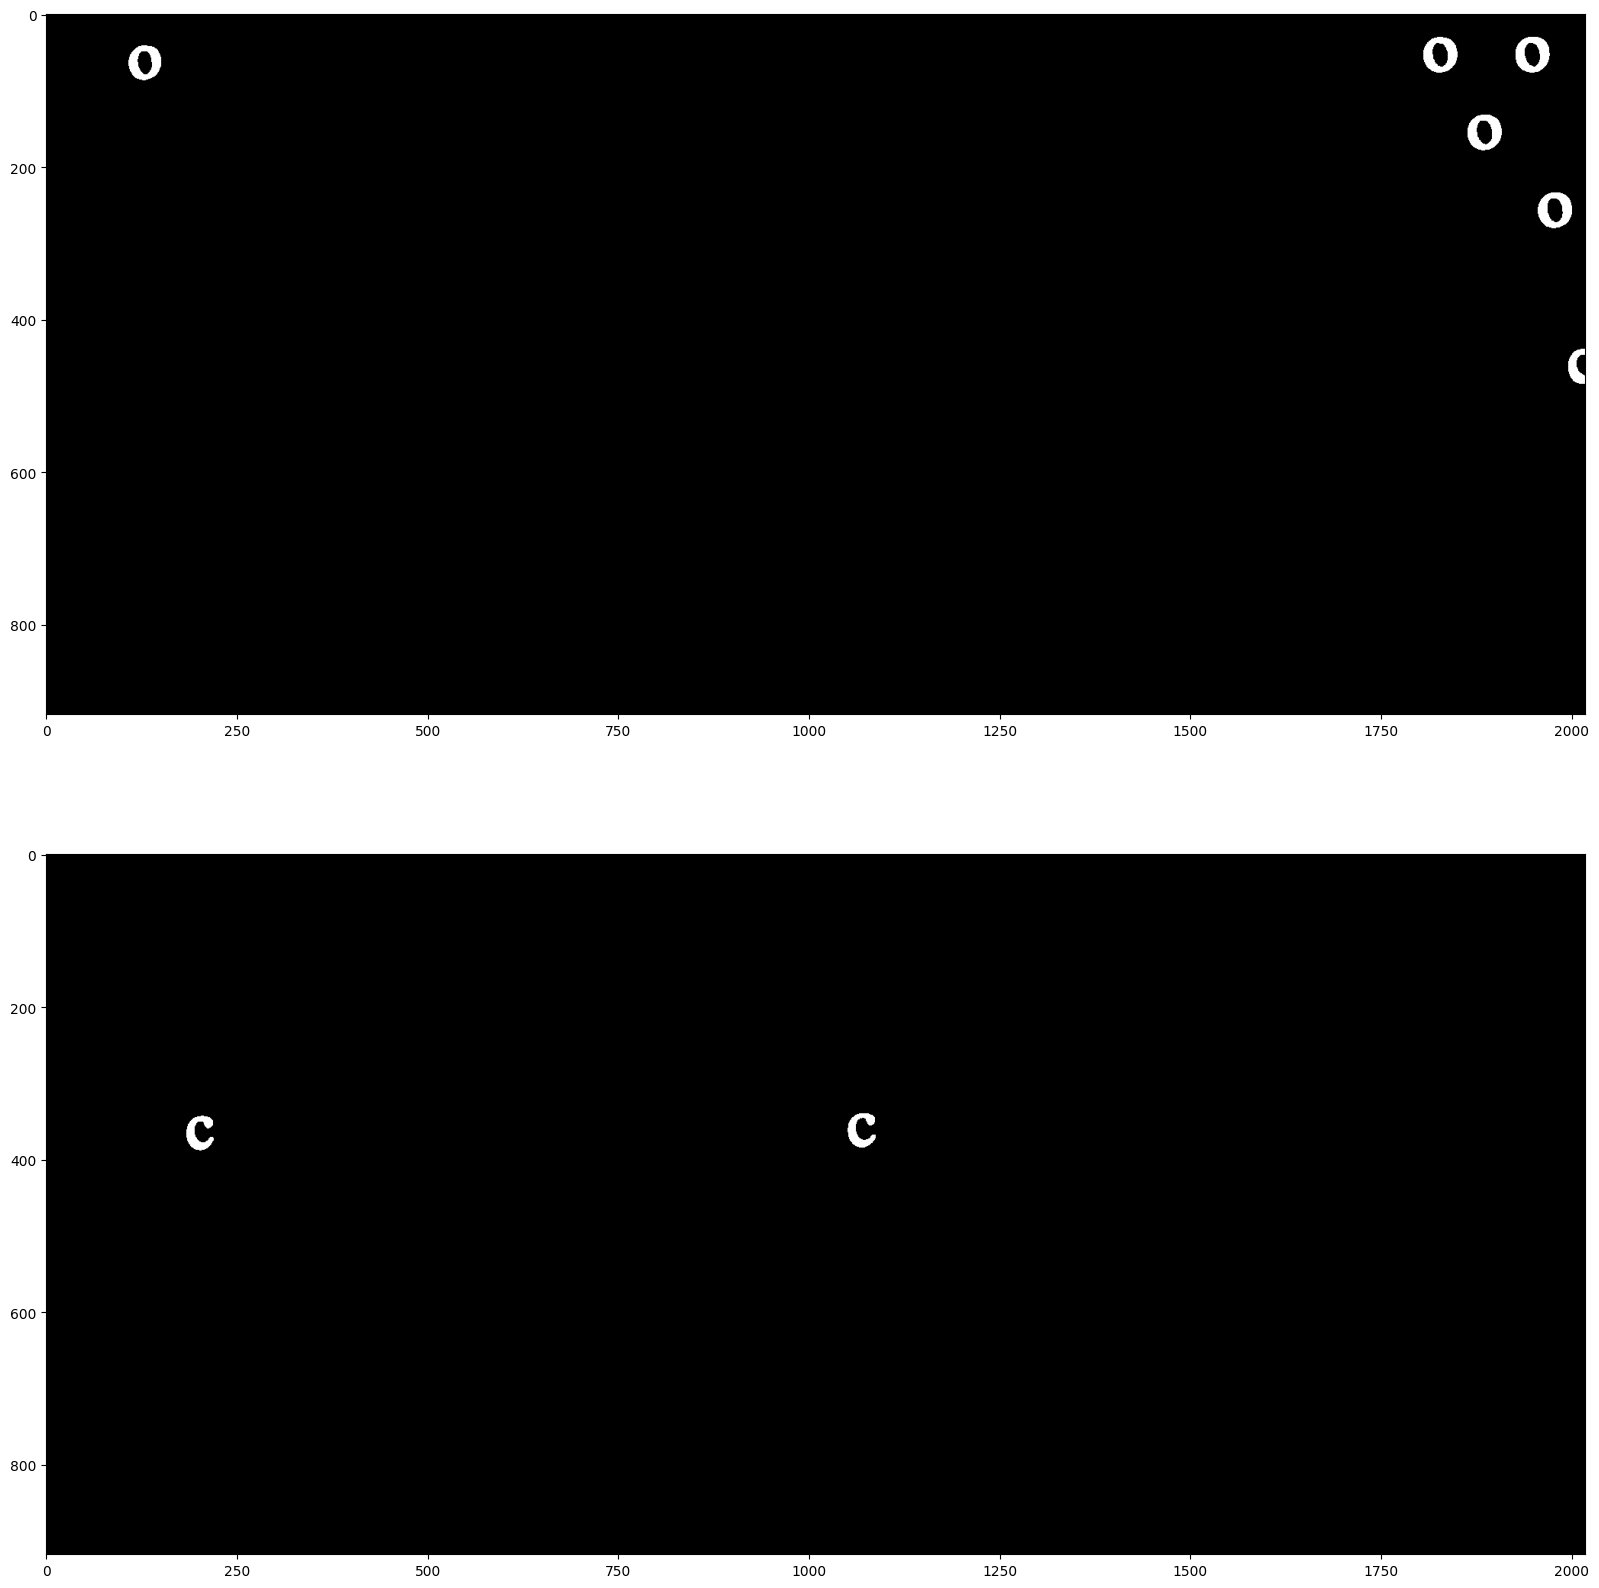

In [335]:
# kernelO4 = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 8))
kernelER = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 4))
er = cv2.erode(getleft, kernelER, iterations=2)
er = imreconstruct(getleft, er, (2, 2))
er = cv2.erode(er, kernel, iterations=2)
er = imreconstruct(getleft, er, (3, 3))

O4fig, axes = plt.subplots(2, 1, figsize=(30, 20))
axes[0].imshow(er, cmap='gray')

kernelC = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 4))
getC = cv2.erode(getleft, kernelC, iterations=2)
getC = imreconstruct(getleft, getC, (3, 3))

getC = cv2.bitwise_xor(getC, er)

axes[1].imshow(getC, cmap='gray')

## **Result**

Compare the result with the original image, we can see that the 'O's are identified correctly.

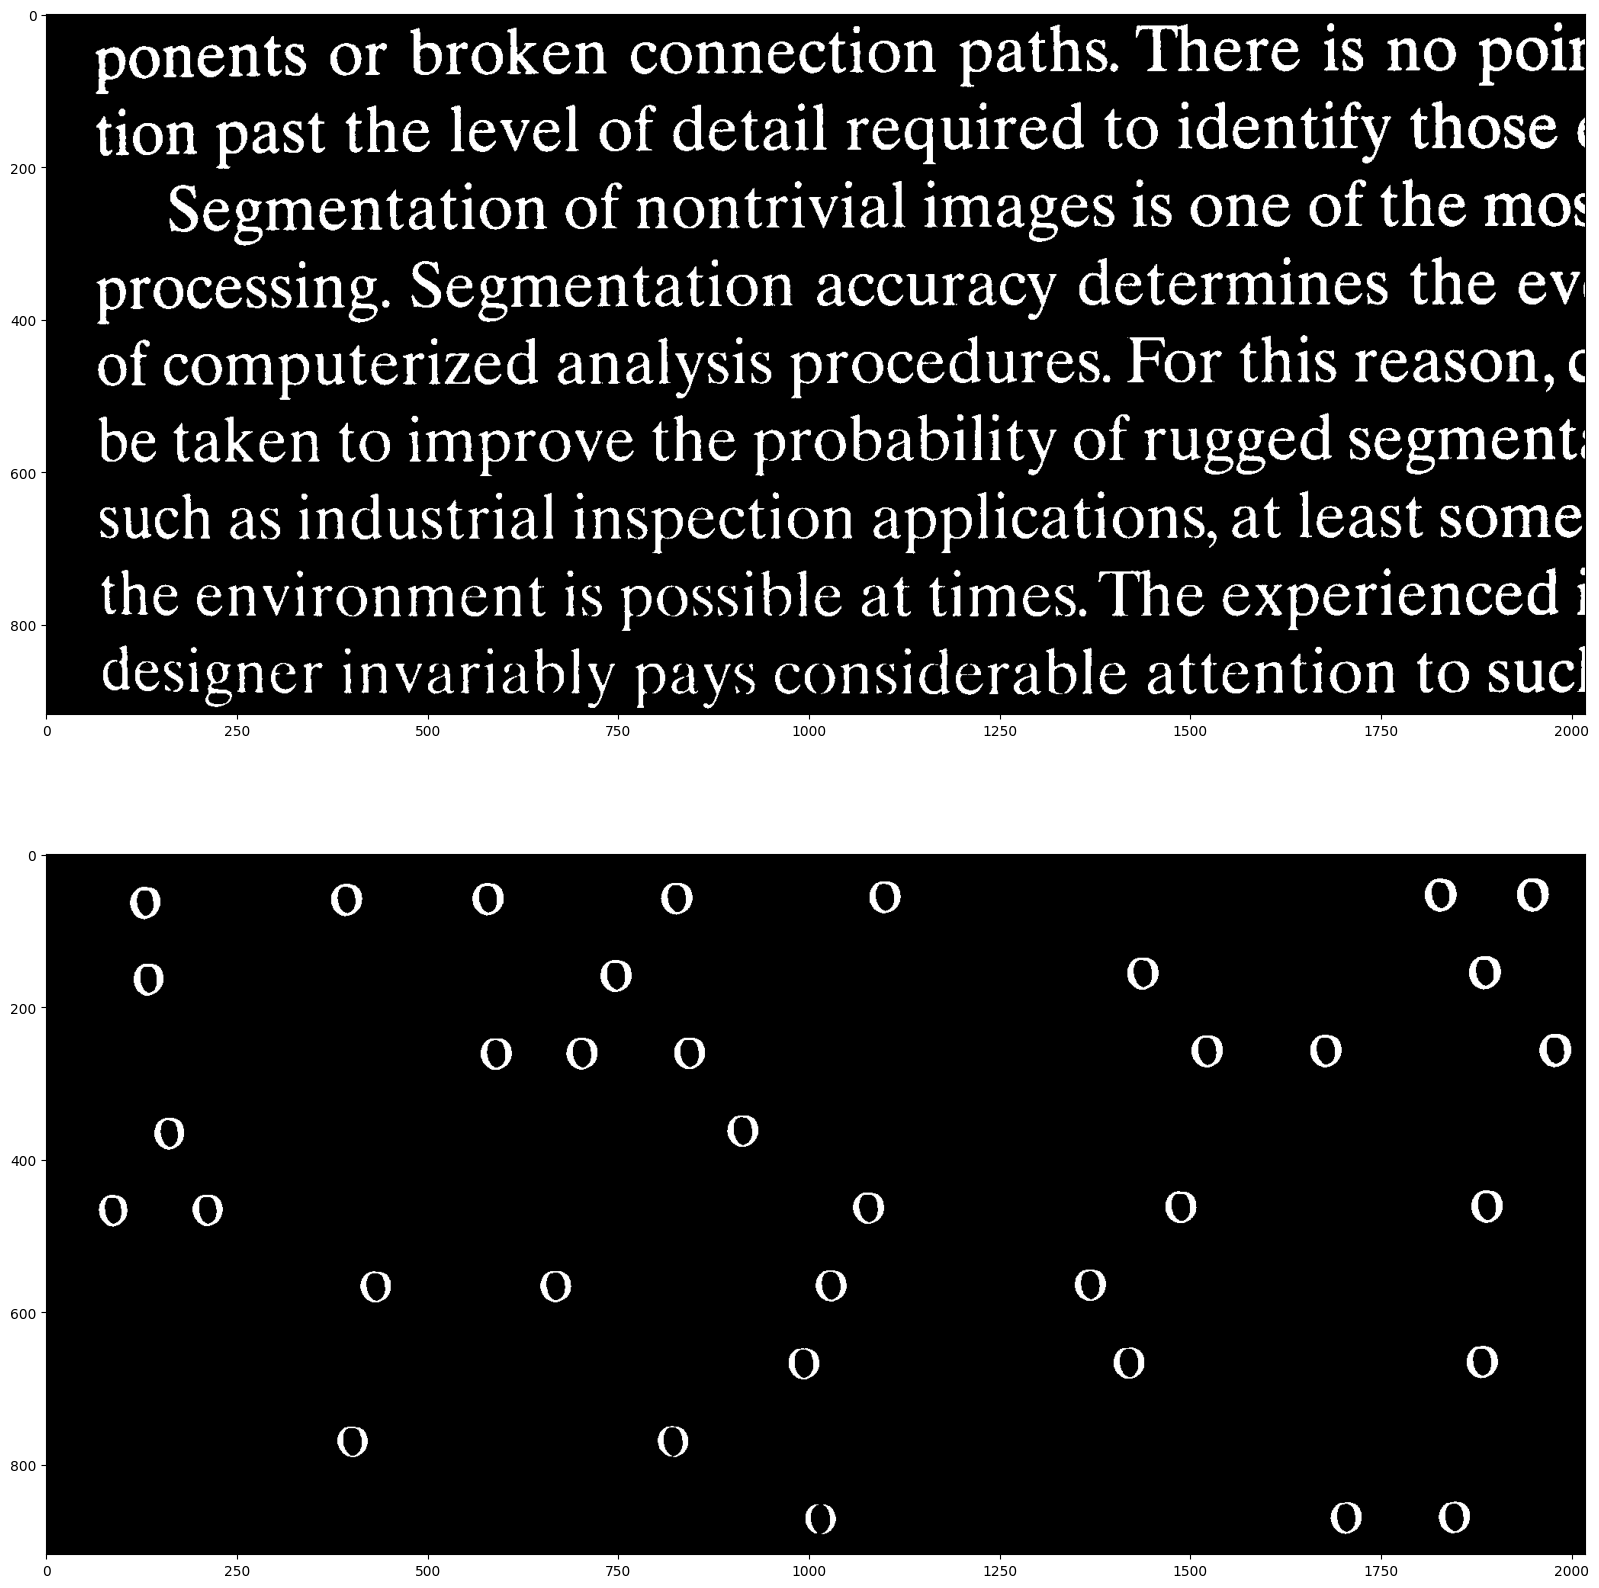

In [336]:
resimg = cv2.bitwise_xor(getleft, getC)
resimg = cv2.bitwise_xor(resimg, rmborder)
resimg = cv2.erode(resimg, kernel, iterations=1)

resfig, axes = plt.subplots(2, 1, figsize=(30, 20))
axes[0].imshow(oriimg, cmap='gray')
axes[1].imshow(resimg, cmap='gray')